# **Exploratory data analysis**
This notebook performs exploratory data analysis (EDA) on a customer churn dataset. The objective is to understand the data, uncover patterns related to churn, and identify key features that may influence customer retention. These insights will later support the development of a churn prediction model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns = df.columns.str.lower()
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df['customerid'].duplicated().any()

np.False_

In [5]:
del df['customerid']

## Missing values

In [6]:
df.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [7]:
df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df[pd.to_numeric(df['totalcharges'], errors='coerce').isna()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")
df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [10]:
print(df['totalcharges'].isna().sum())

11


In [11]:
df['seniorcitizen'] = df['seniorcitizen'].map({0 : 'No', 1: 'Yes' })

In [12]:
df.dtypes

gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

-  The 'seniorcitizen' feature is a binary variable indicating whether a customer is a senior citizen (1) or not (0). Although encoded numerically, it represents a categorical attribute rather than a continuous numerical value

- Although the initial missing value check (df.isnull().sum()) showed no missing values in the dataset, a closer inspection of feature data types revealed an inconsistency.

- The 'totalcharges' column was stored as an object instead of a numerical type, which was unexpected given its meaning. After converting this column to a numeric format, it was found that 11 values were actually missing.

## Churn vs Non-Churn Customer Analysis


In [13]:
df.nunique()

gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6530
churn                  2
dtype: int64

In [14]:
y = df['churn']
X = df.drop(columns='churn')

In [15]:
y_churn = y[df['churn']=='Yes']
X_churn = X[df['churn']=='Yes']

y_no_churn = y[df['churn']=='No']
X_no_churn = X[df['churn']=='No']

In [16]:
X_churn.describe().round()

,tenure,monthlycharges,totalcharges
count,1869.0,1869.0,1869.0
mean,18.0,74.0,1532.0
std,20.0,25.0,1891.0
min,1.0,19.0,19.0
25%,2.0,56.0,134.0
50%,10.0,80.0,704.0
75%,29.0,94.0,2331.0
max,72.0,118.0,8685.0


In [17]:
X_no_churn.describe().round()

,tenure,monthlycharges,totalcharges
count,5174.0,5174.0,5163.0
mean,38.0,61.0,2555.0
std,24.0,31.0,2329.0
min,0.0,18.0,19.0
25%,15.0,25.0,578.0
50%,38.0,64.0,1684.0
75%,61.0,88.0,4264.0
max,72.0,119.0,8672.0


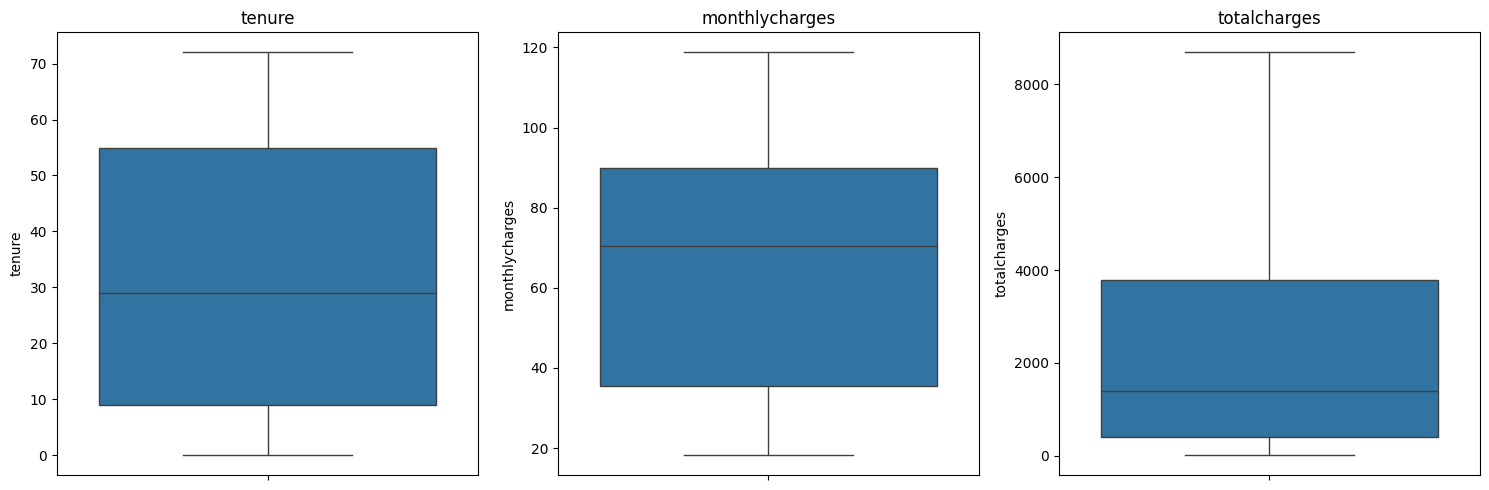

In [18]:
cols = ['tenure', 'monthlycharges', 'totalcharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


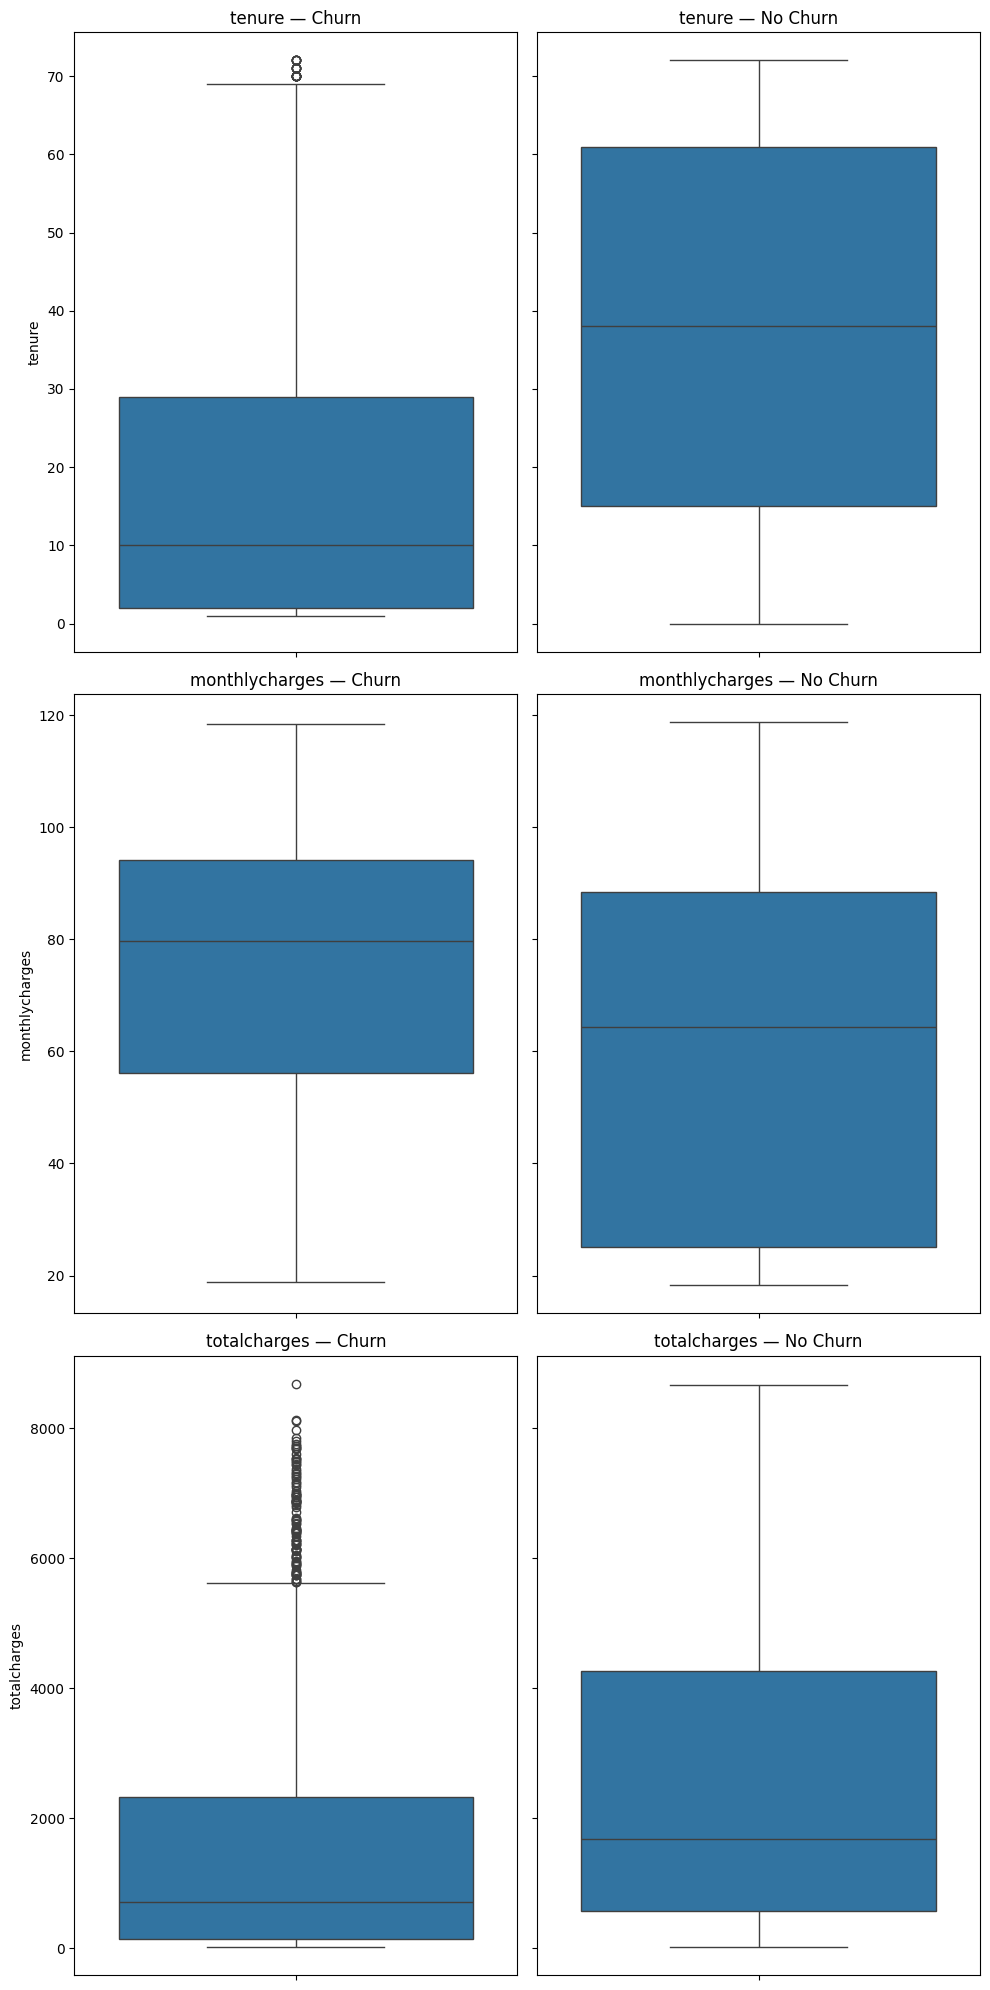

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(10, 20), sharey='row')

for i, col in enumerate(cols):
    # Churn
    sns.boxplot(y=X_churn[col], ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} — Churn")

    # No Churn
    sns.boxplot(y=X_no_churn[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} — No Churn")

plt.tight_layout()
plt.show()


**Tenure**

- Customers who churn tend to have significantly shorter tenure compared to those who remain. The median tenure for churned customers is much lower, indicating that churn is more likely to occur in the early stages of the customer lifecycle.

- In contrast, non-churned customers generally exhibit longer tenure, suggesting that customer retention increases over time.

**MonthlyCharges**

- Churned customers generally have higher monthly charges compared to non-churned customers, as reflected by a higher median value. This suggests that higher recurring costs may contribute to customer dissatisfaction and increase the likelihood of churn.

- Non-churned customers tend to have lower and more evenly distributed monthly charges.

**TotalCharges**

- The distribution of total charges shows that churned customers typically have lower total charges, which is consistent with their shorter tenure. Despite the presence of some high-value outliers, most churned customers have accumulated relatively low total spending.

- Non-churned customers exhibit significantly higher total charges overall, reflecting longer customer relationships and sustained engagement with the service.

In [20]:
num_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c != 'churn']

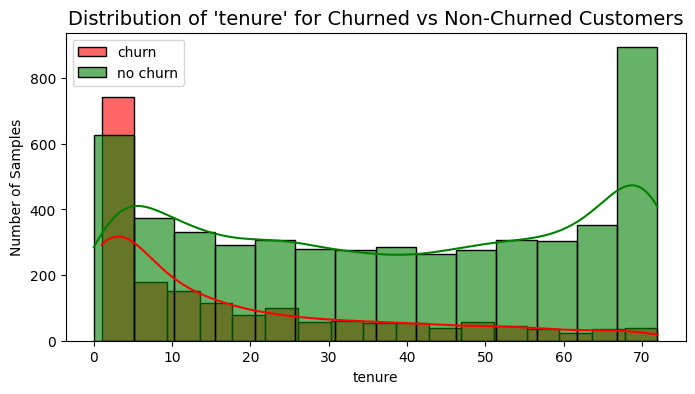

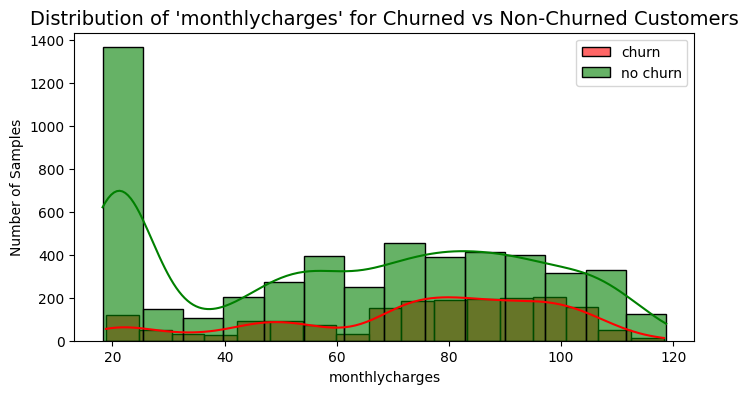

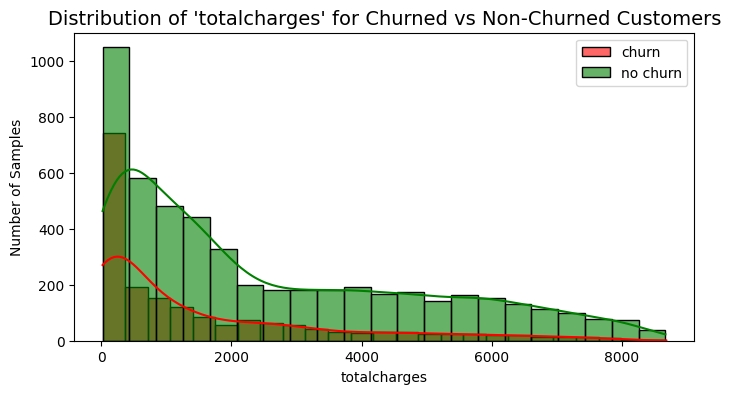

In [21]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    #churn
    sns.histplot(X_churn[col], kde=True, color='red', label='churn', alpha=0.6)
    #no-churn
    sns.histplot(X_no_churn[col], kde=True, color='green', label='no churn', alpha=0.6)
    
    plt.title(f"Distribution of '{col}' for Churned vs Non-Churned Customers", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Number of Samples")
    plt.legend()
    
    plt.show()


<Figure size 800x400 with 0 Axes>

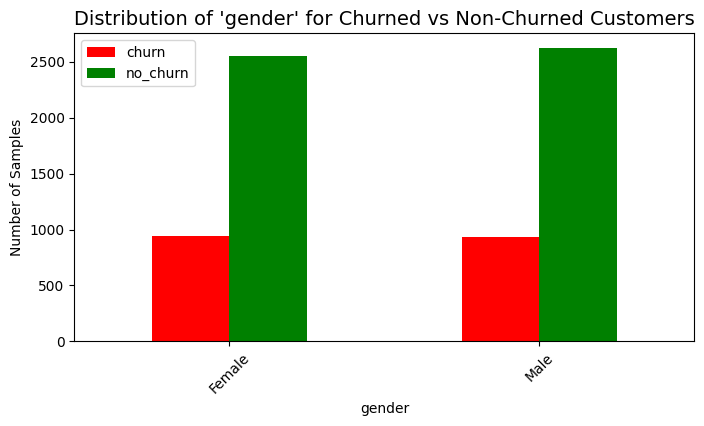

<Figure size 800x400 with 0 Axes>

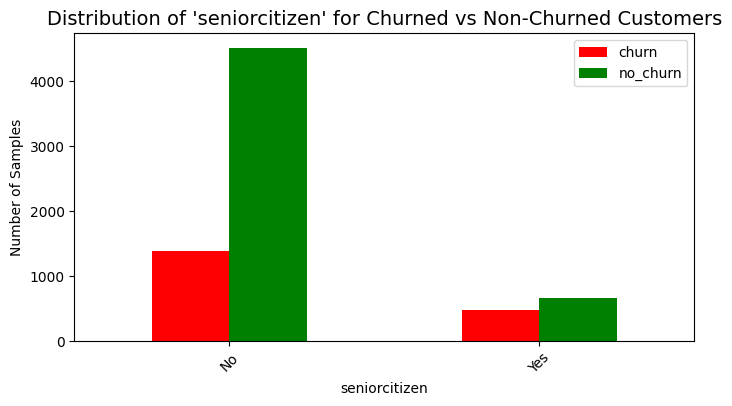

<Figure size 800x400 with 0 Axes>

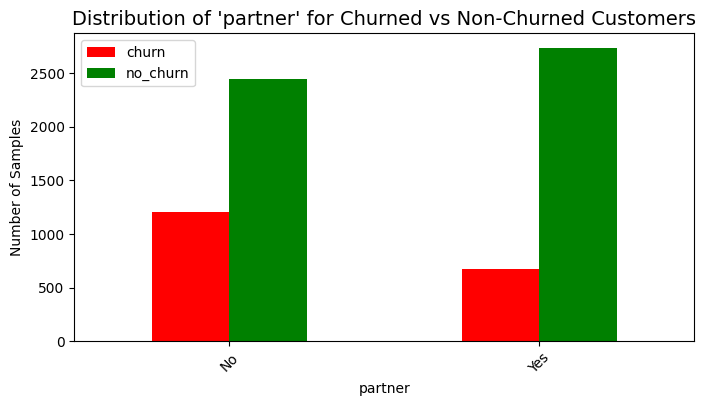

<Figure size 800x400 with 0 Axes>

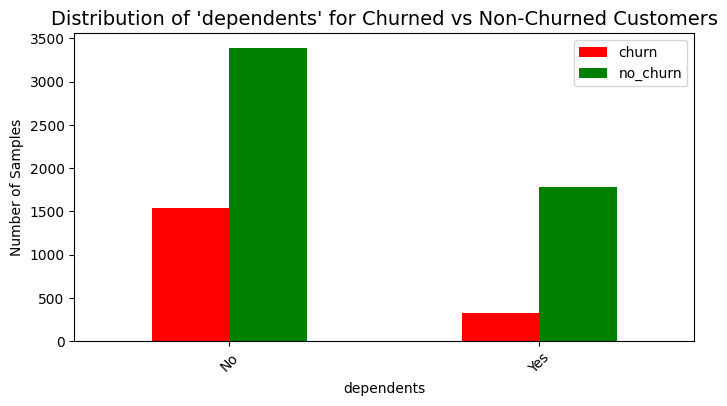

<Figure size 800x400 with 0 Axes>

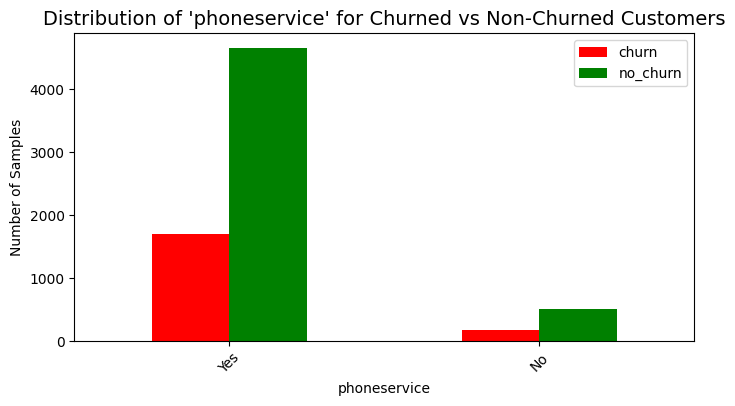

<Figure size 800x400 with 0 Axes>

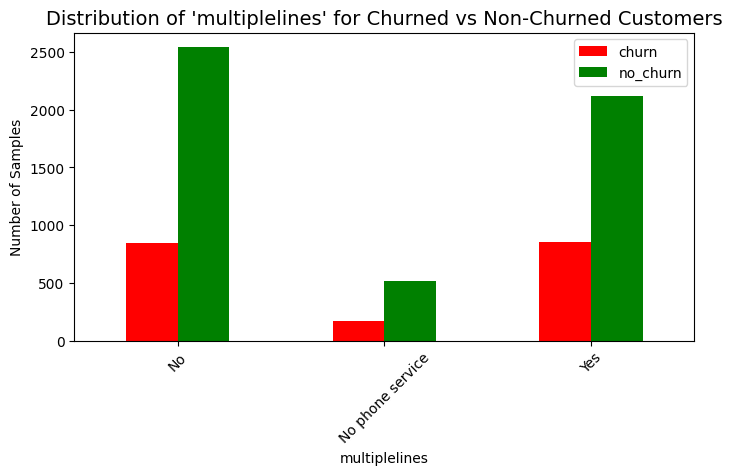

<Figure size 800x400 with 0 Axes>

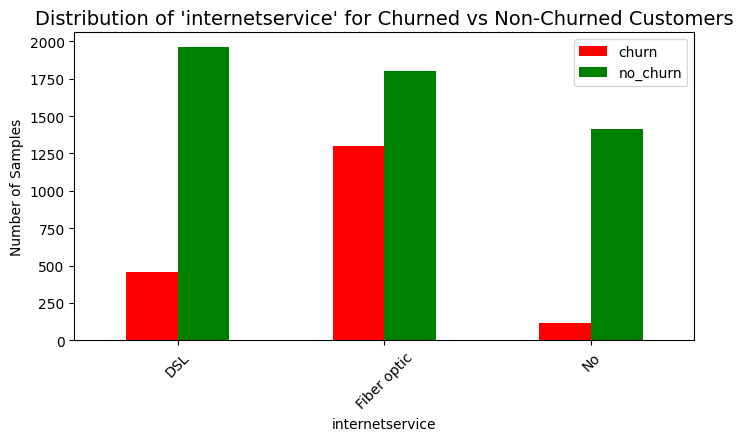

<Figure size 800x400 with 0 Axes>

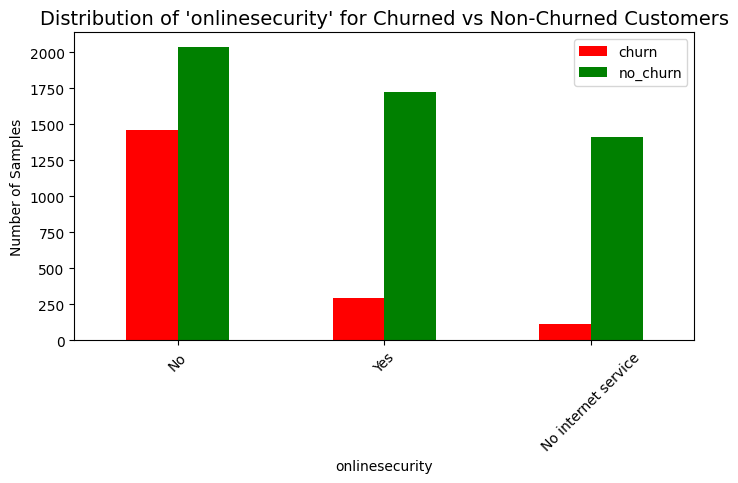

<Figure size 800x400 with 0 Axes>

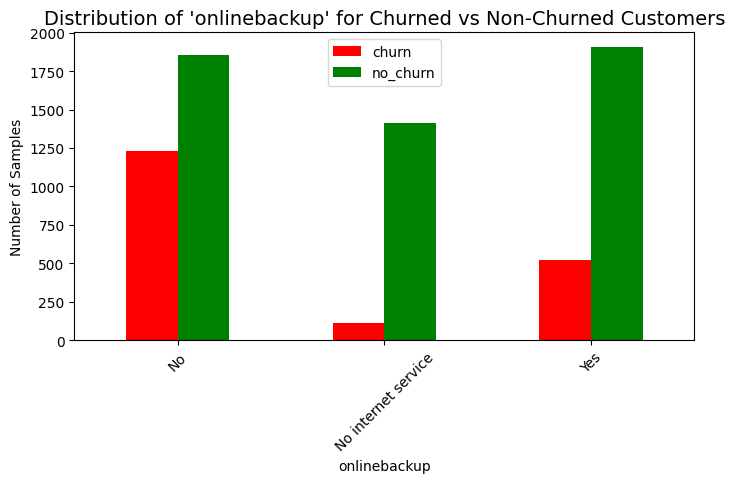

<Figure size 800x400 with 0 Axes>

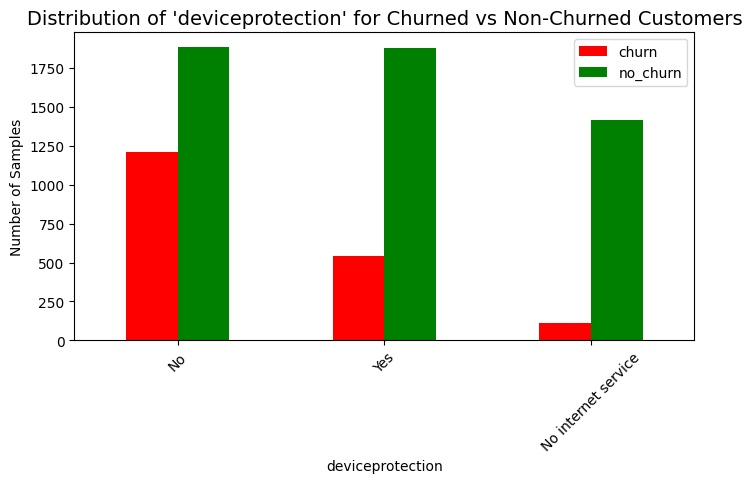

<Figure size 800x400 with 0 Axes>

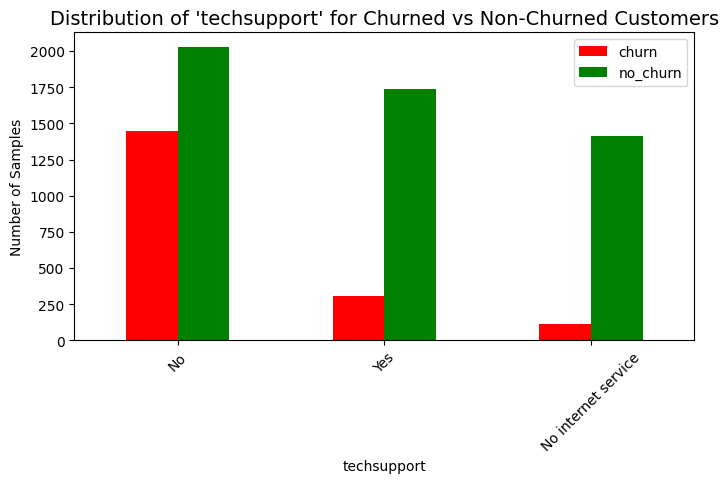

<Figure size 800x400 with 0 Axes>

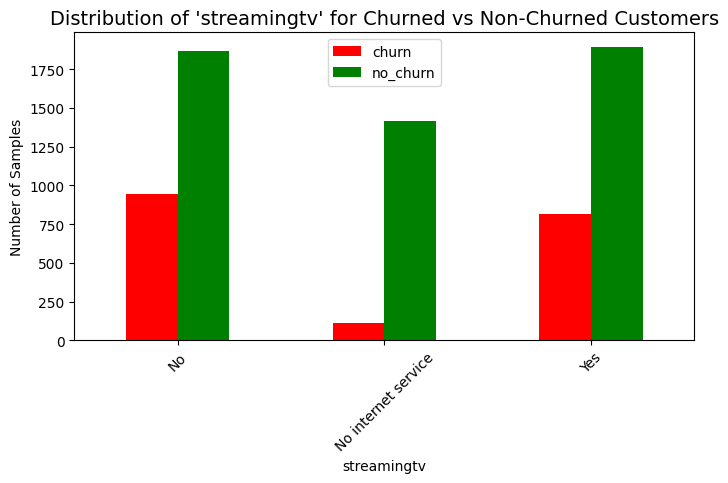

<Figure size 800x400 with 0 Axes>

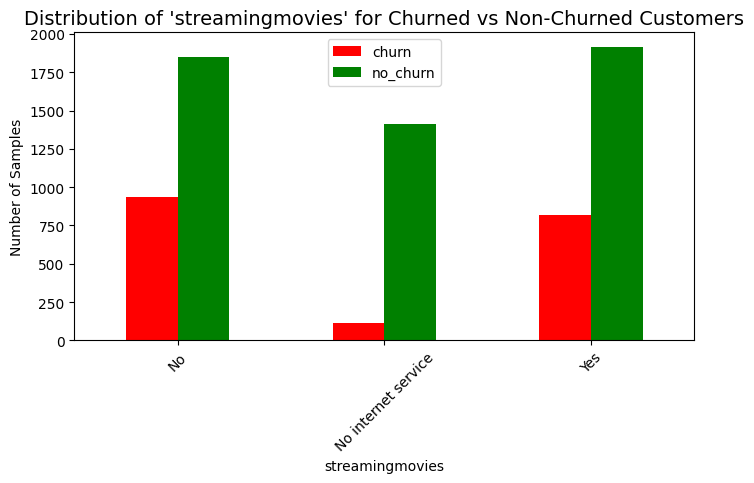

<Figure size 800x400 with 0 Axes>

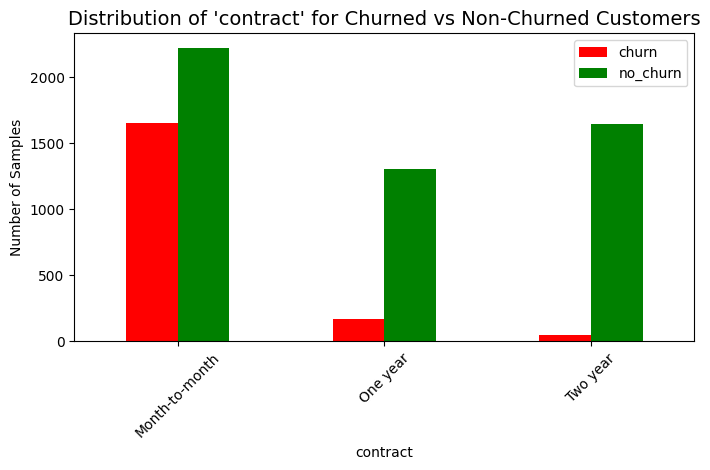

<Figure size 800x400 with 0 Axes>

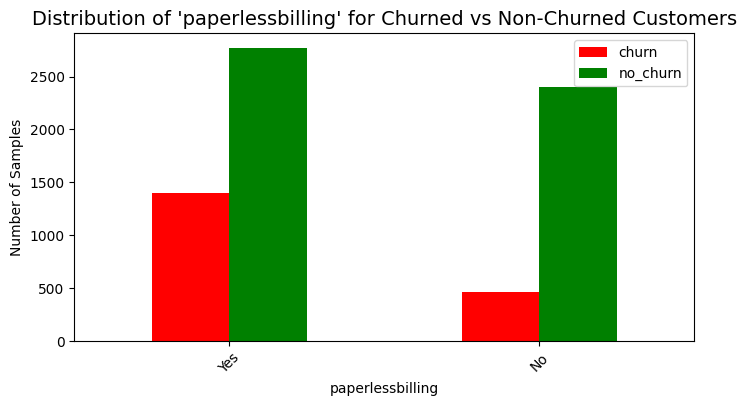

<Figure size 800x400 with 0 Axes>

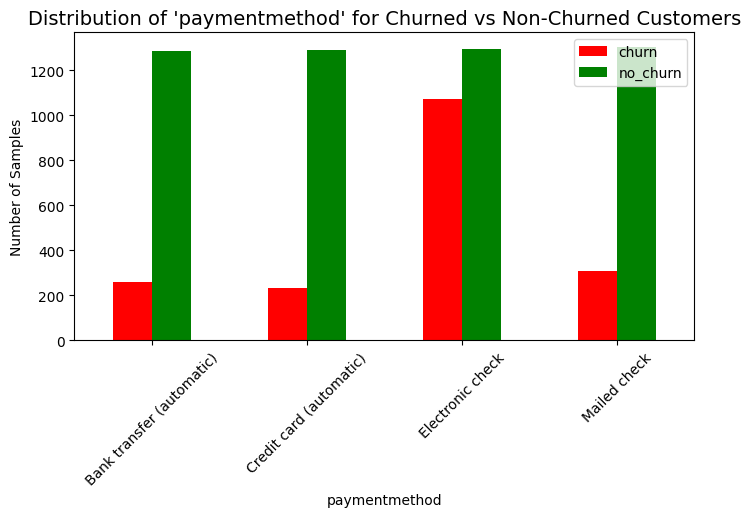

In [22]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    
    churn_counts = X_churn[col].value_counts()
    no_churn_counts = X_no_churn[col].value_counts()
    
    plot_df = pd.DataFrame({
        'churn': churn_counts,
        'no_churn': no_churn_counts
    }) 

    # Bar plot (side-by-side)
    plot_df.plot(kind='bar', figsize=(8,4), color=['red', 'green'])
    
    plt.title(f"Distribution of '{col}' for Churned vs Non-Churned Customers", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.show()


### Key Insights from Categorical Feature Analysis

- The visualizations indicate that gender does not have a significant impact on customer churn. In contrast, customers using Fiber optic internet service show a noticeably higher churn rate compared to other service types.

- Additionally, customers who pay via Electronic check tend to churn more frequently than those using other payment methods. A higher churn rate is also observed among customers with month-to-month contracts, suggesting lower commitment compared to long-term contracts.

In [23]:
services = [
    'streamingmovies',
    'streamingtv',
    'techsupport',
    'deviceprotection',
    'onlinebackup',
    'onlinesecurity'
]

df['additional_services'] = (
    df[services]
    .apply(lambda col: col == 'Yes')
    .sum(axis=1)
)


In [24]:
y = df['churn']
X = df.drop(columns='churn')

y_churn = y[df['churn']=='Yes']
X_churn = X[df['churn']=='Yes']

y_no_churn = y[df['churn']=='No']
X_no_churn = X[df['churn']=='No']

<Figure size 800x400 with 0 Axes>

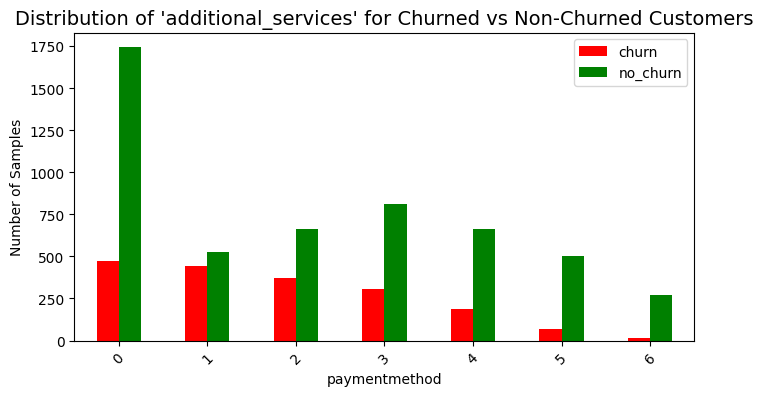

In [25]:

plt.figure(figsize=(8,4))
    
churn_counts = X_churn['additional_services'].value_counts()
no_churn_counts = X_no_churn['additional_services'].value_counts()
    
plot_df = pd.DataFrame({
    'churn': churn_counts,
    'no_churn': no_churn_counts
    }) 


plot_df.plot(kind='bar', figsize=(8,4), color=['red', 'green'])
    
plt.title(f"Distribution of 'additional_services' for Churned vs Non-Churned Customers", fontsize=14)
plt.xlabel(col)
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.legend()
    
plt.show()


<Figure size 800x400 with 0 Axes>

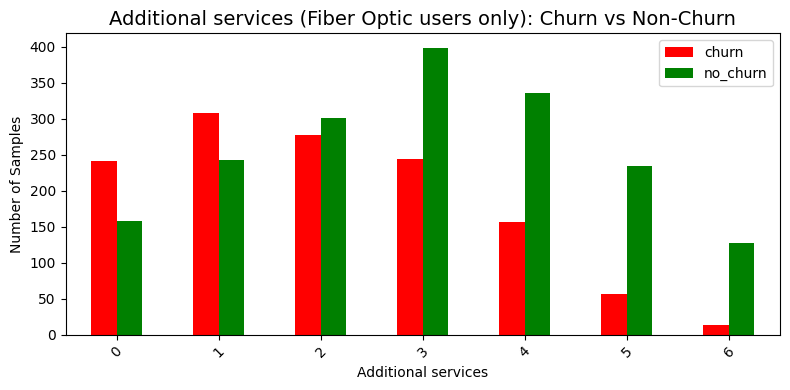

In [26]:
X_churn_fiber = X_churn[X_churn['internetservice'] == 'Fiber optic']
X_no_churn_fiber = X_no_churn[X_no_churn['internetservice'] == 'Fiber optic']

plt.figure(figsize=(8,4))

churn_counts = X_churn_fiber['additional_services'].value_counts()
no_churn_counts = X_no_churn_fiber['additional_services'].value_counts()

plot_df = pd.DataFrame({
    'churn': churn_counts,
    'no_churn': no_churn_counts
})  

plot_df.plot(kind='bar', figsize=(8,4), color=['red', 'green'])

plt.title("Additional services (Fiber Optic users only): Churn vs Non-Churn", fontsize=14)
plt.xlabel("Additional services")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


- Finally, the analysis shows that customers with a greater number of additional services are less likely to churn, indicating that service bundling may play an important role in customer retention.

### Chi-Square Test: Categorical Features vs. Churn
- The Chi-square test was applied to evaluate whether there is a statistically significant association between categorical features and customer churn.

In [27]:
print("Chi-square test for all categorical variables vs. churn:\n")

for col in cat_cols:
    contingency = pd.crosstab(df[col], df['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print(f"Feature: {col}")
    print(f"Chi2 = {chi2:.4f}, p-value = {p:.4f}, dof = {dof}")
    
    if p < 0.05:
        print(">>> Statistically significant association with churn")
    else:
        print(">>> No statistically significant association")
    
    print("-" * 50)


Chi-square test for all categorical variables vs. churn:

Feature: gender
Chi2 = 0.4841, p-value = 0.4866, dof = 1
>>> No statistically significant association
--------------------------------------------------
Feature: seniorcitizen
Chi2 = 159.4263, p-value = 0.0000, dof = 1
>>> Statistically significant association with churn
--------------------------------------------------
Feature: partner
Chi2 = 158.7334, p-value = 0.0000, dof = 1
>>> Statistically significant association with churn
--------------------------------------------------
Feature: dependents
Chi2 = 189.1292, p-value = 0.0000, dof = 1
>>> Statistically significant association with churn
--------------------------------------------------
Feature: phoneservice
Chi2 = 0.9150, p-value = 0.3388, dof = 1
>>> No statistically significant association
--------------------------------------------------
Feature: multiplelines
Chi2 = 11.3304, p-value = 0.0035, dof = 2
>>> Statistically significant association with churn
-----------

In [28]:
expected_df = pd.DataFrame(
    expected,
    index=contingency.index,
    columns=contingency.columns
)

(expected_df < 5).sum().sum(), expected_df.size

(np.int64(0), 8)

#### Key Findings

- The results show that gender and PhoneService do not have a statistically significant relationship with churn, indicating that these features are unlikely to be useful predictors.
- In contrast, several features demonstrate a statistically significant association with churn, including Partner, Dependents, MultipleLines, InternetService, and PaymentMethod.
- All contingency tables satisfied the Chi-square test assumptions, as no expected cell frequencies were below 5.

While the Chi-square test confirms whether a relationship exists, it does not measure the strength of that relationship. Therefore, these results should be interpreted alongside Cramér’s V, which provides insight into the magnitude of the associations.

## Categorical Feature Analysis (Cramér’s V)
- Cramér’s V was used to analyze the relationship between categorical features and customer churn. The heatmap highlights both weak and strong associations across variables.

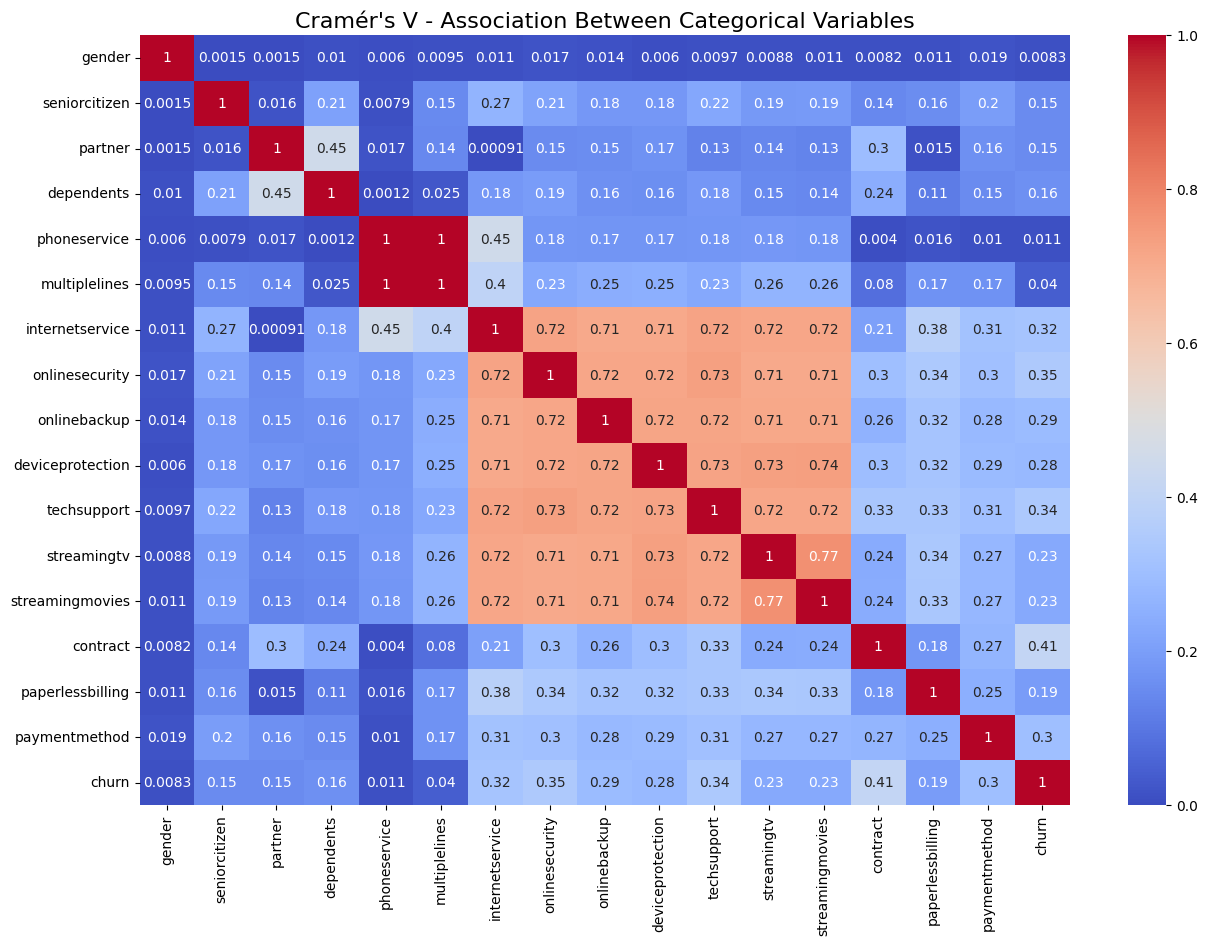

In [29]:
def cramers_v(x, y):
    """Computes Cramér's V between two categorical variables"""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


# Create Cramér's V matrix
cols = cat_cols + ['churn'] 
cramers_matrix = pd.DataFrame(
    np.zeros((len(cols), len(cols))),
    index=cols,
    columns=cols
)

for col1 in cols:
    for col2 in cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(15, 10))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V - Association Between Categorical Variables", fontsize=16)
plt.show()


#### Key Insights
- Features such as gender and PhoneService show almost no association with churn and therefore have limited predictive value.
- Demographic variables (Partner and Dependents) show weak associations with churn and are not strong predictors on their own.
- A group of internet-related services (onlinesecurity, techsupport, streamingservices...) shows strong interdependence, indicating redundancy among these features.
The strongest associations with churn are observed for Contract type, followed by internetservice, onlinesecurity, techsupport, paymentmethod, and paperlessbilling. Among them, Contract type is the most influential categorical feature.

### Correlation Analysis of Numerical Features
- A correlation matrix shows how numerical features are related to each other. Pearson correlation values indicate the strength and direction of these relationships, helping to spot highly related features and potential multicollinearity before modeling.

In [47]:
df['churn_1'] = df['churn'].map({'No': 0, 'Yes': 1})

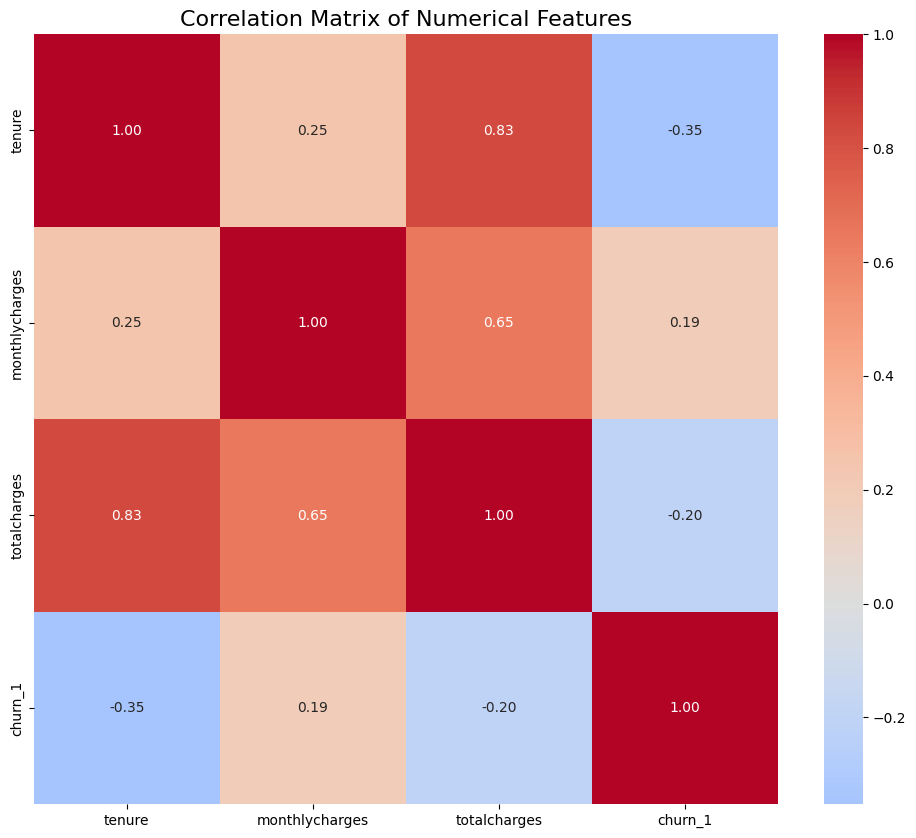

In [48]:
num_cols = num_cols + ['churn_1']

corr_matrix = df[num_cols].corr()  # Pearson correlation by default

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()



The Pearson correlation measures the linear relationship between two numerical variables.  
`totalcharges` is calculated as `tenure * monthlycharges`, so it is highly correlated with these two features.  
This can cause **multicollinearity**
- **tenure and totalcharges (0.83):** Strong positive correlation; longer-tenured customers have higher total charges.  
- **totalcharges and monthlycharges (0.65):** Moderate positive correlation; higher monthly fees generally lead to higher total charges.  
- **tenure and monthlycharges (0.25):** Weak correlation; monthly charges are not strongly related to customer tenure.  
- **Tenure** is the strongest predictor among these three; loyal customers tend to stay.